Root Mean Squared Error for Cycle 1: 0.20266038046761423


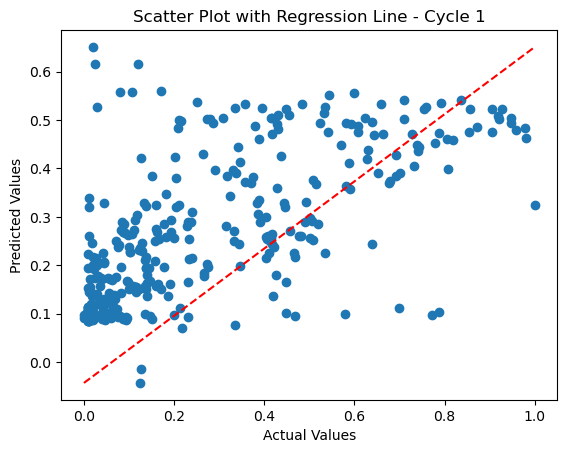

Root Mean Squared Error for Cycle 2: 0.2104323270074529


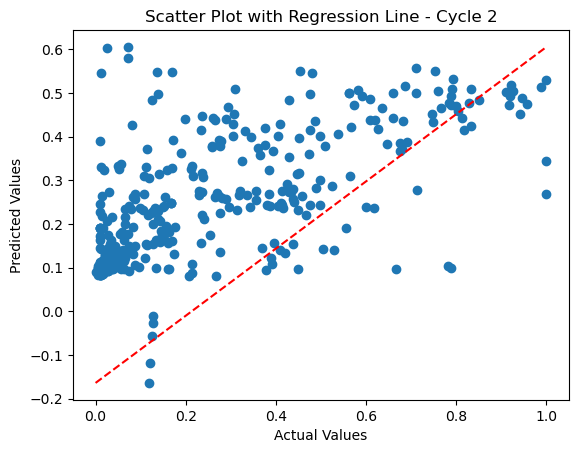

Root Mean Squared Error for Cycle 3: 0.20295121869632873


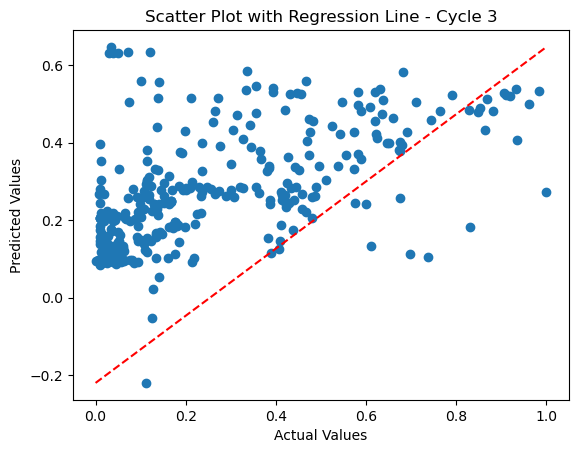

Root Mean Squared Error for Cycle 4: 0.21570642133391504


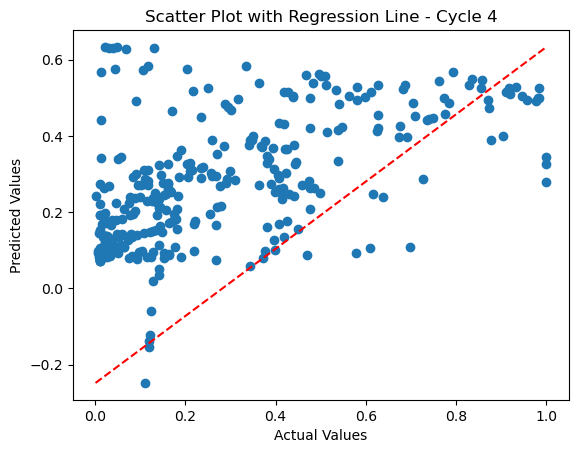

Root Mean Squared Error for Cycle 5: 0.2189029761427232


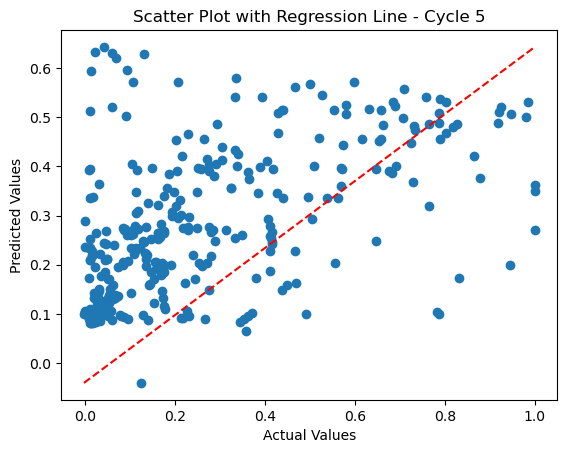

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Nb']

# Assume 'target_column' is the name of your target variable
X = data[features]  # Features
ylin = data['Tot Vol Frac Other']

# Set the number of cycles through all data for testing
num_cycles = 5  # Adjust this number as needed

# Initialize the logistic regression model
linreg = LinearRegression()

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=cycle)
    
    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error for Cycle {cycle + 1}: {rmse}")

    # Scatter Plot with Regression Line
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot with Regression Line - Cycle {cycle + 1}')
    plt.show()